In [320]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [331]:
Vm = 80
L = 11.
rhom = 250
nx = 51
dt = 0.001

In [332]:
dx = L/(nx-1)
A = Vm/rhom
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50


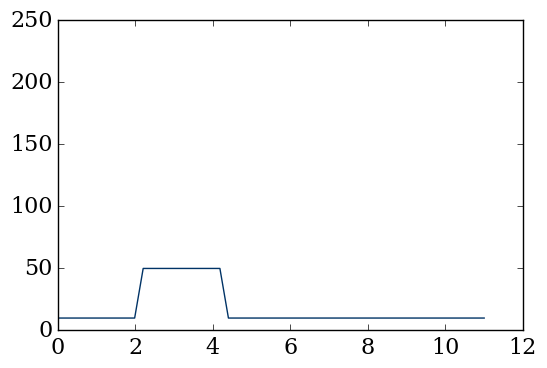

In [333]:
pyplot.plot(x, rho0, color='#003366', ls='-', lw=1)
pyplot.ylim(0,250);

In [334]:
rho = rho0.copy()

In [335]:
def traffic(nt,rho):
    for n in range(nt): 
        rhon = rho.copy() 
        rho[1:] = rhon[1:]-dt/dx*(rhon[1:]-rhon[:-1])*(Vm-2*rhon[1:]*A)
        rho[0] = 10
        
    return rho

La fonction principale est terminée, testons la avec des temps t=0, t=3minutes et t=6 minutes. Ce qui correspond à des intervalles nt=0, nt=50 et nt=100

In [268]:
rho = traffic(50,rho)

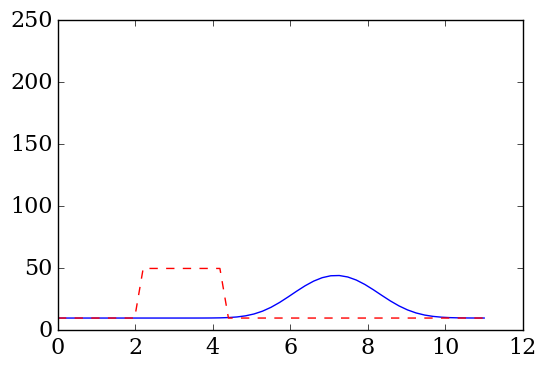

In [269]:
pyplot.plot(x, rho, color='b', ls='-', lw=1)
pyplot.plot(x, rho0, color='r', ls='--', lw=1)
pyplot.ylim(0,250);

In [270]:
V = Vm*(1-rho0.copy()/rhom)

In [289]:
min(V)/3.6

30.222222222222225

In [274]:
V = Vm*(1-rho.copy()/rhom)

In [275]:
len(V)

51

In [276]:
numpy.mean(V)/3.6

20.636172084776391

In [277]:
rho = traffic(100,rho0)

In [278]:
V = Vm*(1-rho.copy()/rhom)

In [279]:
min(V)/3.6

18.8611252718


# Partie 2

In [296]:
Vm = 136

In [297]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50

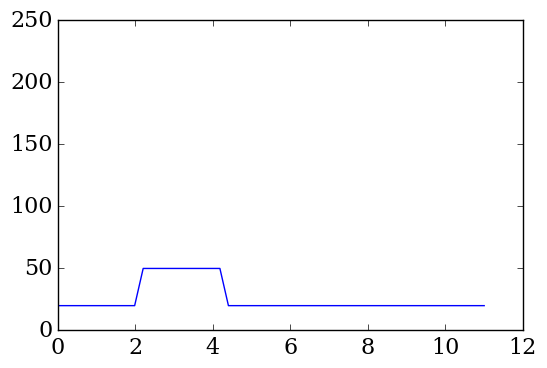

In [298]:
pyplot.plot(x, rho0, color='b', ls='-', lw=1)
pyplot.ylim(0,250);

In [299]:
def traffic(nt,rho):
    for n in range(nt): 
        rhon = rho.copy() 
        rho[1:] = rhon[1:]-dt/dx*(rhon[1:]-rhon[:-1])*(Vm-2*rhon[1:]*A)
        rho[0] = 20
        
    return rho

In [300]:
V = Vm*(1-rho0.copy()/rhom)

In [301]:
min(V/3.6)

30.222222222222225

In [302]:
rho = traffic(50,rho0)

In [303]:
V = Vm*(1-rho.copy()/rhom)

In [304]:
numpy.mean(V)/3.6

33.983729073347696

In [305]:
min(V/3.6)

30.893076663051566

# Partie 3 (Bonus)

In [328]:
from matplotlib import animation
from IPython.display import HTML

In [336]:
def diffusion(i):
    line.set_data(x,rho)
    
    rhon = rho.copy() 
    rho[1:] = rhon[1:]-dt/dx*(rhon[1:]-rhon[:-1])*(Vm-2*rhon[1:]*A)
    rho[0] = 20

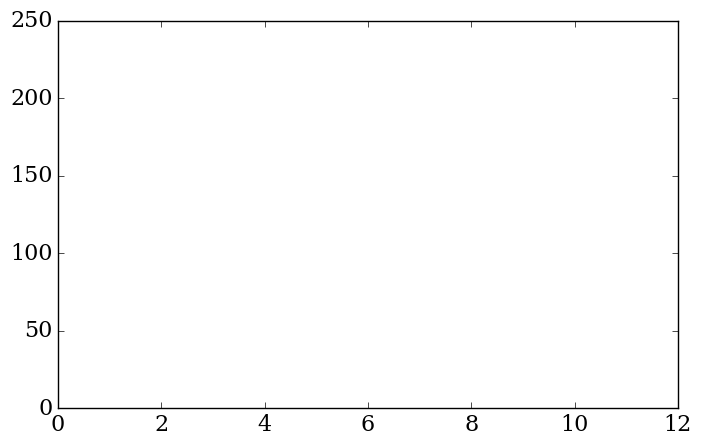

In [337]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,12), ylim=(0,250))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

In [338]:
anim = animation.FuncAnimation(fig, diffusion,
                               frames=50, interval=100)

In [339]:
HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!